In [ ]:
!pip install -U ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 130.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="lqiMHBOSIqLGCKvZgB67")
project = rf.workspace("pavan-g-hzipt").project("animal2-ps24m")
version = project.version(2)

dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animal2-2 in yolov8:: 100%|██████████| 23374/23374 [00:03<00:00, 7458.90it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!cat /content/animal2-2/data.yaml

names:
- Cheetah
- baison
- bear
- camel
- deer
- elephant
- giraffe
- kangaroo
- lion
- tiger
- wolf
- zeebra
nc: 12
roboflow:
  license: CC BY 4.0
  project: animal2-ps24m
  url: https://universe.roboflow.com/pavan-g-hzipt/animal2-ps24m/dataset/2
  version: 2
  workspace: pavan-g-hzipt
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"


In [ ]:
from ultralytics import RTDETR

# Load pretrained RT-DETR Large (ResNet backbone)
model = RTDETR("rtdetr-l.pt")


In [ ]:
# Disable wandb completely
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"


In [ ]:
!pip install -U ultralytics==8.3.0 roboflow --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
Tesla T4


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="lqiMHBOSIqLGCKvZgB67")
project = rf.workspace("pavan-g-hzipt").project("animal2-ps24m")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls /content/animal2-2
!cat /content/animal2-2/data.yaml


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
names:
- Cheetah
- baison
- bear
- camel
- deer
- elephant
- giraffe
- kangaroo
- lion
- tiger
- wolf
- zeebra
nc: 12
roboflow:
  license: CC BY 4.0
  project: animal2-ps24m
  url: https://universe.roboflow.com/pavan-g-hzipt/animal2-ps24m/dataset/2
  version: 2
  workspace: pavan-g-hzipt
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
from ultralytics import RTDETR

model = RTDETR("rtdetr-l.pt")

model.train(
    data="/content/animal2-2/data.yaml",
    epochs=20,
    imgsz=640,
    batch=8,
    device=0,      # ✅ GPU
    workers=2,
    amp=True,      # mixed precision
    plots=True
)

print("✅ Training started successfully WITHOUT wandb")


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/animal2-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       1/20      7.29G     0.5812      1.764     0.3728         18        640: 100% ━━━━━━━━━━━━ 1047/1047 1.6it/s 10:51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.858      0.761      0.831      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/20      6.71G     0.4671     0.4696     0.2559         45        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       2/20      6.72G     0.4629     0.5991     0.2801        112        640: 47% ━━━━━╸────── 488/1047 1.7it/s 4:54<5:28

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       2/20      6.72G     0.4605     0.6001      0.281         55        640: 49% ━━━━━╸────── 517/1047 1.7it/s 5:11<5:10

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       2/20      6.81G     0.4583     0.5974     0.2818         15        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247       0.85      0.785      0.854      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/20       7.2G     0.4079     0.5443     0.2008         59        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       3/20       7.2G     0.4419     0.5696     0.2703         21        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.856      0.801      0.867      0.612

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/20       7.2G     0.4426     0.5076     0.2216         65        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       4/20      7.21G     0.4293     0.5362     0.2652         21        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.9s
                   all       2148       9247      0.881      0.814      0.884      0.627

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/20      7.21G     0.4214     0.6389     0.2122         45        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       5/20      7.21G     0.4157     0.5146     0.2561         18        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.9s
                   all       2148       9247      0.877      0.831      0.889      0.641

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/20      7.21G     0.4194     0.4867      0.231         53        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       6/20      7.21G     0.4095     0.5024      0.248         10        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.9s
                   all       2148       9247      0.882      0.836      0.899      0.651

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/20      7.21G     0.6516     0.4302     0.2883         60        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       7/20      7.21G     0.3965     0.4834     0.2412         17        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.892      0.856      0.905      0.663

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       8/20      7.21G     0.3317     0.4944       0.22         38        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       8/20      7.21G     0.3888     0.4711     0.2349         16        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.3it/s 40.5s
                   all       2148       9247      0.889      0.856      0.907      0.667

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       9/20      7.21G     0.4437     0.4537     0.2621         63        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


       9/20      7.21G     0.3858     0.4673     0.2303         27        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.8s
                   all       2148       9247      0.898      0.862      0.914       0.67

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      10/20      7.21G     0.4477     0.4477      0.307         47        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      10/20      7.21G     0.3748     0.4553     0.2241         13        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.8s
                   all       2148       9247      0.898      0.869      0.918      0.676
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      11/20      7.21G     0.3188      0.346     0.1162         49        640: 0% ──────────── 0/1047  1.1s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      11/20      7.21G     0.3293      0.406     0.2344          7        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:20
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.896      0.871      0.919      0.683

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      12/20      7.21G      0.195     0.2981     0.1163         29        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      12/20      7.21G     0.3229     0.3933     0.2274          8        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.9s
                   all       2148       9247      0.896      0.874      0.922      0.689

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      13/20      7.21G     0.3409     0.3812     0.1762         41        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      13/20      7.21G      0.316     0.3841     0.2194          8        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.1s
                   all       2148       9247      0.895      0.884      0.924      0.696

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/20      7.21G     0.3015     0.3357     0.1167         35        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      14/20      7.21G     0.3118     0.3803     0.2147          7        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.9s
                   all       2148       9247      0.902       0.88      0.927        0.7

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/20      7.21G     0.2509     0.3115     0.1472         34        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      15/20      7.21G     0.3013     0.3751     0.2068         10        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.901      0.882      0.926      0.706

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/20      7.21G     0.3935     0.4817     0.4146         22        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      16/20      7.21G     0.2974     0.3693     0.2042          8        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.1s
                   all       2148       9247      0.894      0.887      0.928      0.704

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/20      7.21G     0.2825     0.2746     0.1663         20        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      17/20      7.21G     0.2911     0.3617     0.1987          6        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247        0.9      0.885      0.929       0.71

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/20      7.21G      0.361     0.4426     0.2771         40        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      18/20      7.21G     0.2874     0.3577     0.1971          9        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.1s
                   all       2148       9247      0.906      0.879      0.931       0.71

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/20      7.21G     0.2997     0.3089     0.2427         17        640: 0% ──────────── 0/1047  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      19/20      7.21G      0.282     0.3531     0.1928          6        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 39.8s
                   all       2148       9247      0.901      0.889      0.931      0.713

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/20      7.21G     0.2487     0.3857     0.1048         53        640: 0% ──────────── 0/1047  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)


      20/20      7.21G      0.277     0.3475     0.1858          5        640: 100% ━━━━━━━━━━━━ 1047/1047 1.7it/s 10:18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.4it/s 40.0s
                   all       2148       9247      0.899       0.89      0.931      0.713

20 epochs completed in 3.810 hours.
Optimizer stripped from /content/runs/detect/train3/weights/last.pt, 66.3MB
Optimizer stripped from /content/runs/detect/train3/weights/best.pt, 66.3MB

Validating /content/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 310 layers, 32,008,400 parameters, 0 gradients, 103.5 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.3it/s 41.2s
                   all       2148       9247      0.901      0.889      0.931      0.713
               Cheetah        

In [ ]:
!ls runs/detect


train  train2  train3


In [ ]:
!find runs/detect -name best.pt


runs/detect/train3/weights/best.pt
runs/detect/train2/weights/best.pt


In [ ]:
from ultralytics import RTDETR

best_model = RTDETR("runs/detect/train3/weights/best.pt")
print("✅ RT-DETR best model loaded successfully")


✅ RT-DETR best model loaded successfully


In [ ]:
import pandas as pd

df2 = pd.read_csv("runs/detect/train2/results.csv")
df3 = pd.read_csv("runs/detect/train3/results.csv")

print("Train2 Final mAP50:", df2.iloc[-1]["metrics/mAP50(B)"])
print("Train3 Final mAP50:", df3.iloc[-1]["metrics/mAP50(B)"])


Train2 Final mAP50: 0.0109
Train3 Final mAP50: 0.93074


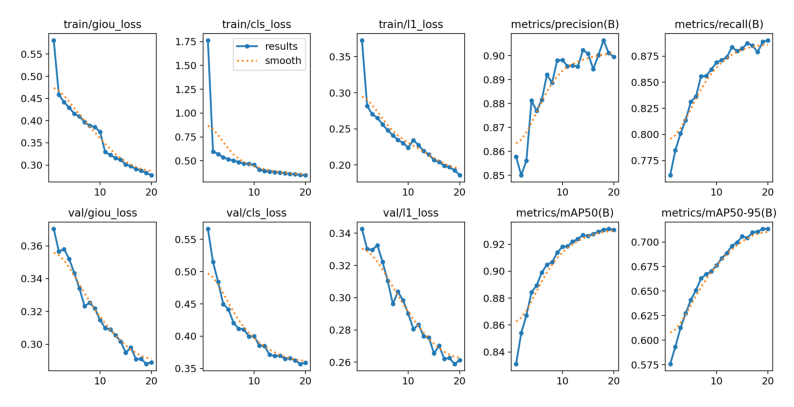

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("runs/detect/train3/results.png")
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()


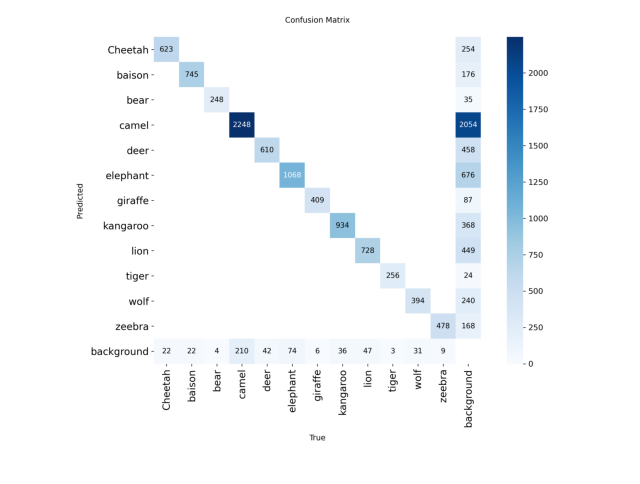

In [ ]:
img = mpimg.imread("runs/detect/train3/confusion_matrix.png")
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()


Using device: GPU
✅ RT-DETR model loaded successfully
📤 Upload input video


Saving chh4.mp4 to chh4.mp4
Frames: 342, Resolution: 1920x778, FPS: 30


  0%|          | 0/342 [00:00<?, ?it/s]

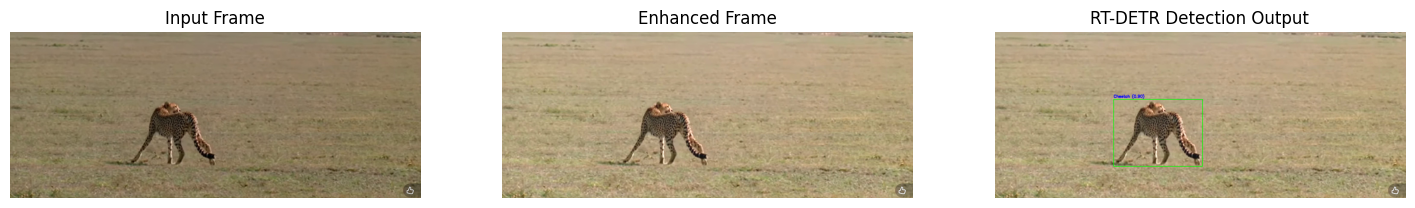

  8%|▊         | 29/342 [00:02<00:21, 14.28it/s]

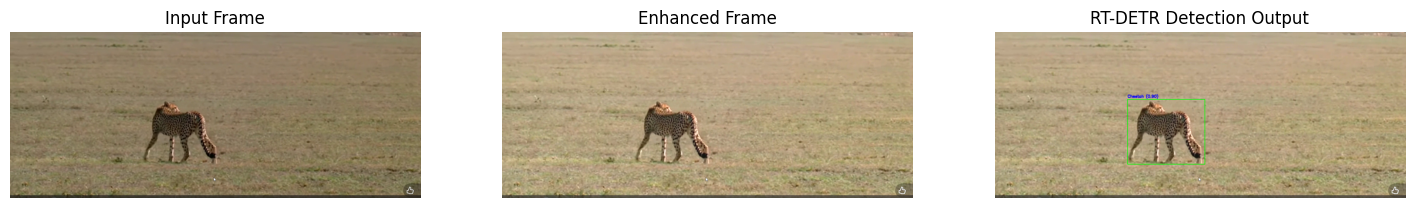

 17%|█▋        | 59/342 [00:05<00:20, 13.58it/s]

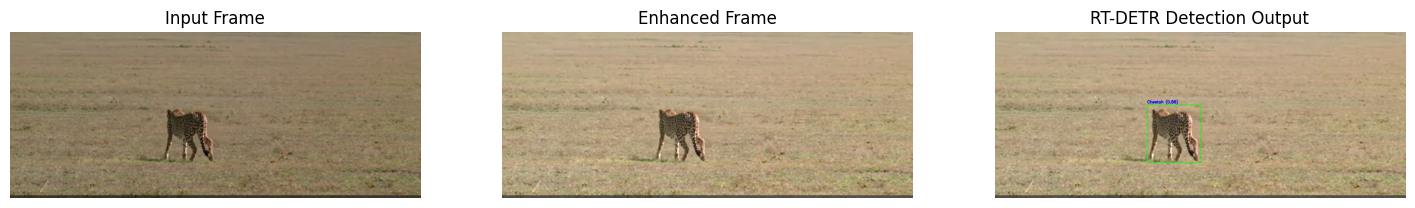

 26%|██▌       | 89/342 [00:08<00:18, 13.69it/s]

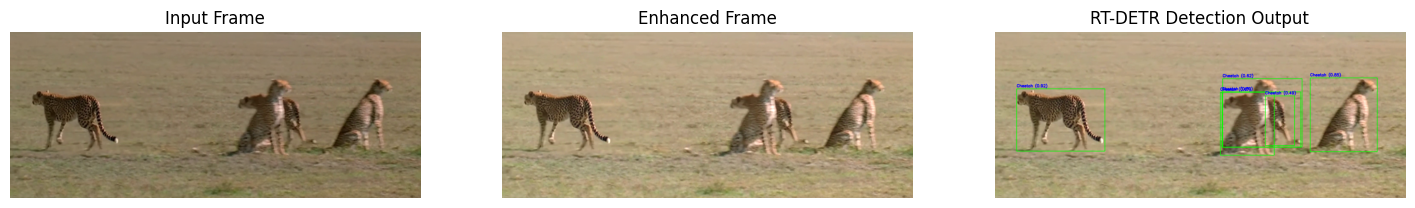

 35%|███▍      | 119/342 [00:10<00:20, 10.65it/s]

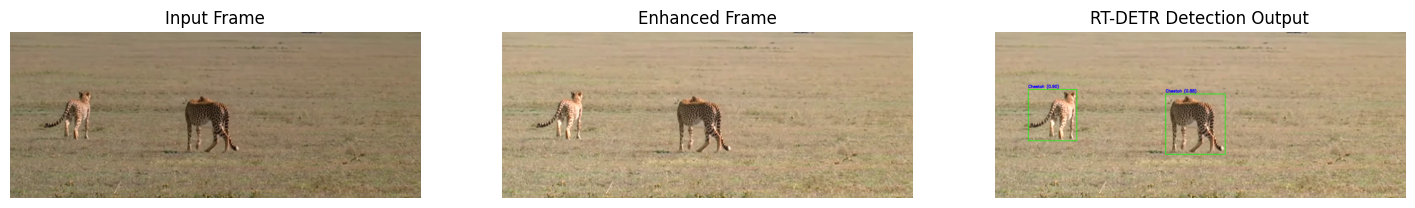

 44%|████▎     | 149/342 [00:14<00:14, 13.45it/s]

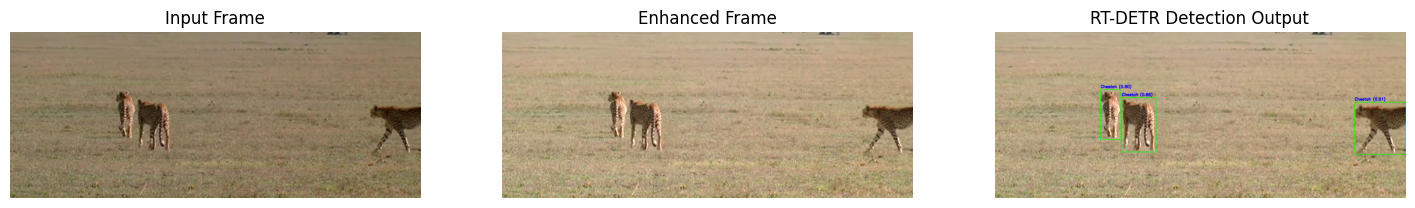

 52%|█████▏    | 179/342 [00:16<00:12, 13.39it/s]

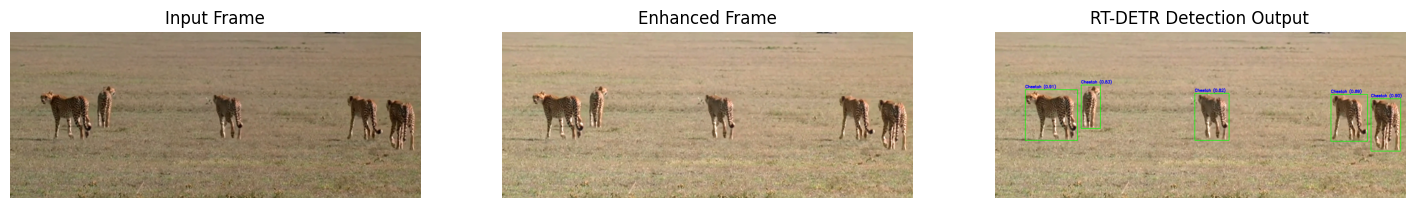

 61%|██████    | 209/342 [00:19<00:10, 13.02it/s]

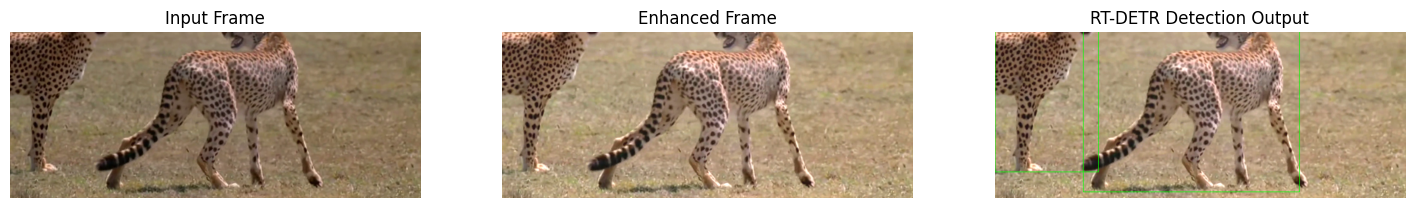

 70%|███████   | 240/342 [00:22<00:08, 12.17it/s]

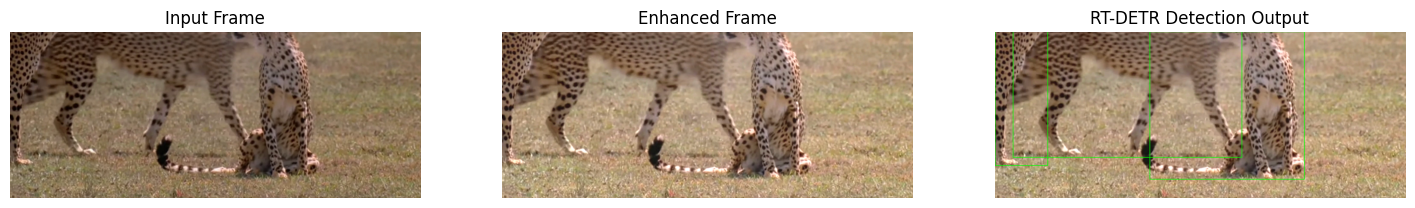

 79%|███████▉  | 270/342 [00:26<00:06, 11.19it/s]

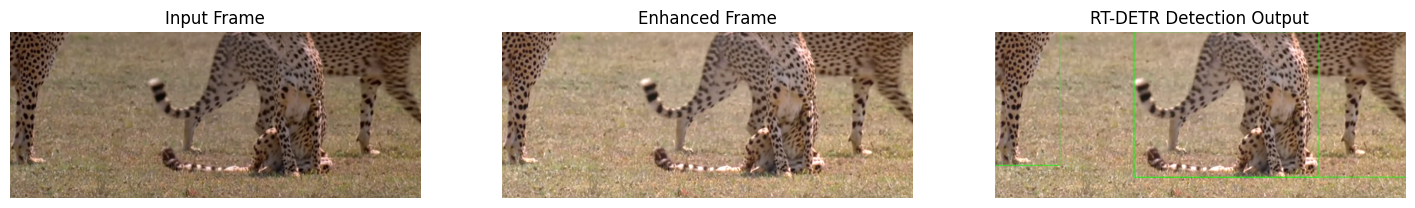

 88%|████████▊ | 300/342 [00:29<00:03, 12.71it/s]

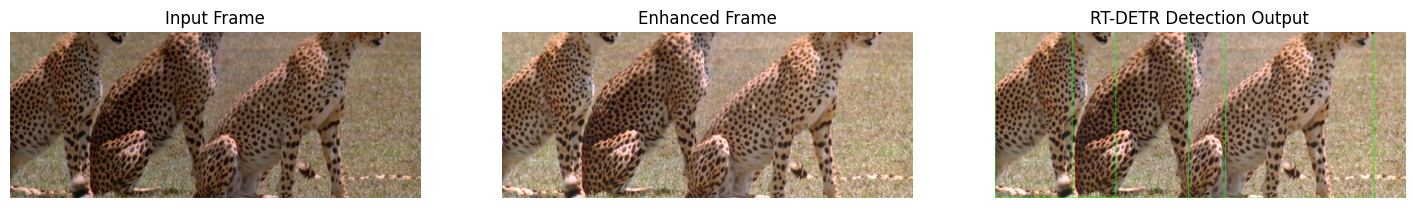

 96%|█████████▋| 330/342 [00:32<00:00, 12.30it/s]

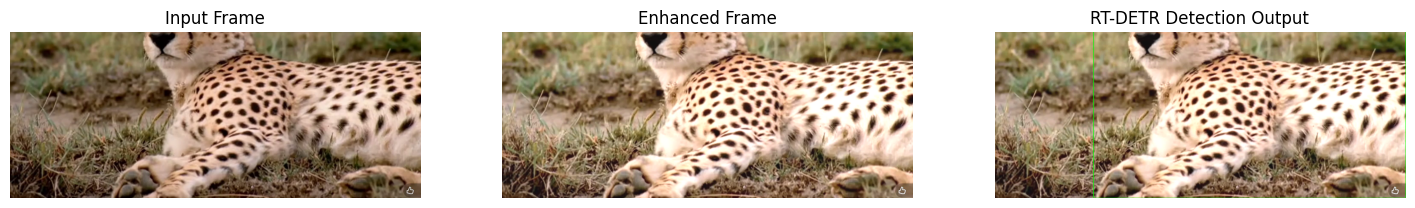

100%|██████████| 342/342 [00:33<00:00, 10.15it/s]

✅ Video inference completed successfully
📁 Output saved as: rtdetr_video_output.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =========================================================
# RT-DETR VIDEO INFERENCE (ALL-IN-ONE)
# Uses your trained model: train3/weights/best.pt
# =========================================================

# -----------------------------
# 1️⃣ Imports
# -----------------------------
from ultralytics import RTDETR
import torch
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files

# -----------------------------
# 2️⃣ Device Setup
# -----------------------------
device = 0 if torch.cuda.is_available() else "cpu"
print("Using device:", "GPU" if device == 0 else "CPU")

# -----------------------------
# 3️⃣ Load Trained RT-DETR Model
# -----------------------------
MODEL_PATH = "runs/detect/train3/weights/best.pt"
model = RTDETR(MODEL_PATH)
model.to(device)

print("✅ RT-DETR model loaded successfully")

# -----------------------------
# 4️⃣ Upload Video
# -----------------------------
print("📤 Upload input video")
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# -----------------------------
# 5️⃣ Video I/O Setup
# -----------------------------
cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

out_path = "rtdetr_video_output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))

print(f"Frames: {total_frames}, Resolution: {width}x{height}, FPS: {fps}")

# -----------------------------
# 6️⃣ Video Inference Loop
# -----------------------------
frame_id = 0

for _ in tqdm(range(total_frames)):
    ret, frame = cap.read()
    if not ret:
        break

    # -------------------------
    # INPUT FRAME
    # -------------------------
    input_frame = frame.copy()

    # -------------------------
    # ENHANCED FRAME (optional)
    # -------------------------
    enhanced_frame = cv2.convertScaleAbs(frame, alpha=1.2, beta=15)

    # -------------------------
    # RT-DETR Inference
    # -------------------------
    results = model.predict(
        source=enhanced_frame,
        imgsz=640,
        conf=0.4,
        device=device,
        verbose=False
    )

    output_frame = enhanced_frame.copy()

    # -------------------------
    # Draw Bounding Boxes
    # -------------------------
    for r in results:
        if r.boxes is None:
            continue

        boxes = r.boxes.xyxy.cpu().numpy()
        scores = r.boxes.conf.cpu().numpy()
        classes = r.boxes.cls.cpu().numpy()

        for box, score, cls in zip(boxes, scores, classes):
            x1, y1, x2, y2 = map(int, box)
            label = model.names[int(cls)]

            cv2.rectangle(output_frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(
                output_frame,
                f"{label} ({score:.2f})",
                (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (255, 0, 0),
                2
            )

    # -------------------------
    # Write Output Frame
    # -------------------------
    out.write(output_frame)

    # -------------------------
    # Display Every 30 Frames
    # -------------------------
    if frame_id % 30 == 0:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        axs[0].imshow(cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB))
        axs[0].set_title("Input Frame")
        axs[0].axis("off")

        axs[1].imshow(cv2.cvtColor(enhanced_frame, cv2.COLOR_BGR2RGB))
        axs[1].set_title("Enhanced Frame")
        axs[1].axis("off")

        axs[2].imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
        axs[2].set_title("RT-DETR Detection Output")
        axs[2].axis("off")

        plt.show()

    frame_id += 1

# -----------------------------
# 7️⃣ Release Resources
# -----------------------------
cap.release()
out.release()

print("✅ Video inference completed successfully")
print("📁 Output saved as:", out_path)

# -----------------------------
# 8️⃣ Download Output Video
# -----------------------------
files.download(out_path)
